# APS360 Tutorial 2 - Review of Python

## Introduction

In tutorial 1, we reviewed basics of Python and how Numpy extends vanilla Python for many tasks in scientific computing. 

In this tutorial, we will go over two libraries, Matplotlib for data visualization and PyTorch for machine learning.

## Matplotlib

Matplotlib is a plotting library. This section gives a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt

### Plotting

The most important function in `matplotlib.pyplot` is `plot`, which allows you to plot 2D data. Here is a simple example:

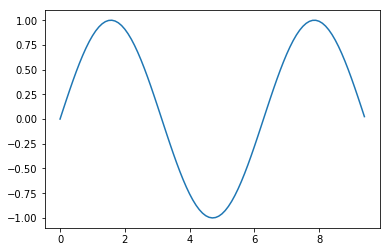

In [2]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

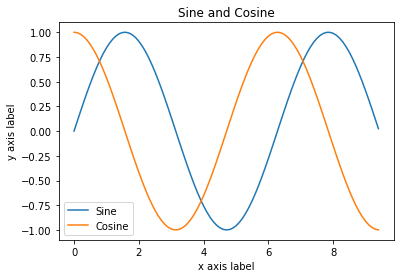

In [3]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Can plot multiple graphs
plt.plot(x, y_sin)
plt.plot(x, y_cos)

# Set x and y label
plt.xlabel('x axis label')
plt.ylabel('y axis label')

# Set title and legend
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

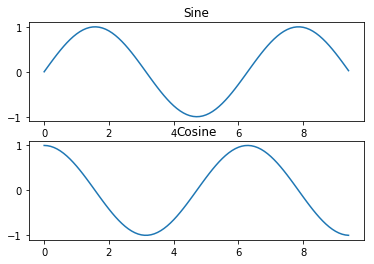

In [4]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1.
# This sets the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active
plt.subplot(2, 1, 2)

# Make the second plot.
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

### Images

`imshow` function from `pyplot` module can be used to show images. For example:

In [5]:
img = plt.imread('cute-kittens.jpg')

print(img)

[[[  2   2   2]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  1   1   1]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  1   1   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[106 102  91]
  [ 95  88  78]
  [103  94  85]
  ...
  [137 126 120]
  [141 130 124]
  [146 135 129]]

 [[ 94  90  79]
  [ 99  92  82]
  [109 100  91]
  ...
  [120 109 103]
  [121 110 104]
  [126 115 109]]

 [[103  99  88]
  [102  95  85]
  [101  92  83]
  ...
  [128 117 111]
  [129 118 112]
  [134 123 117]]]


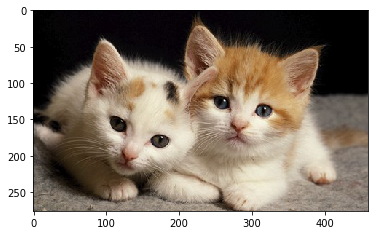

In [6]:
# Show the original image
plt.imshow(img) # Similar to plt.plot but for image
plt.show()

Note that each cells in an image is composed of 3 color channels (i.e. RGB color). Often the last axis is used for color channels, in the order of red, green, and blue. 

In [7]:
print(img.shape) # 460 width x 276 height x RGB (3 channels)

(276, 460, 3)


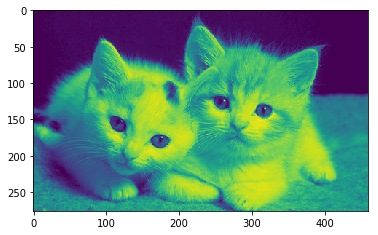

In [8]:
# Displaying only red color channel

plt.imshow(img[:, :, 0])
plt.show()

## PyTorch

PyTorch is a Python-based scientific computing package. PyTorch is currently, along with Tensorflow, one of the most popular machine learning library. 

PyTorch, at its core, is similar to Numpy in a sense that they both 
1. try to make it easier to write codes for scientific computing
2. achieve improved performance over vanilla Python by leveraging highly optimized C back-end.

However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

### Tensor

Mathematically speaking, tensor is a mathematical object for representing multi-dimensional arrays and tensor can be thought of as generalization of vectors and matrices. Tensor extends vector(1-D grid of numbers) and matrix(2-D grid of numbers) to represent any dimensional structure. 

In PyTorch, `tensor` is similar to Numpy's `ndarray` but can be used on a GPU to accelerate computing.

`tensor` can be created using initialization functions, similar to ones for `ndarray`.

In [9]:
import torch

In [10]:
x = torch.empty(5, 3)
print(x)

tensor([[0.0000e+00, 2.0000e+00, 0.0000e+00],
        [2.0000e+00, 1.8217e-44, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 9.2196e-41],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [11]:
x = torch.rand(5, 3)
print(x)

tensor([[0.7518, 0.0221, 0.1475],
        [0.6794, 0.4572, 0.6822],
        [0.3718, 0.1297, 0.7393],
        [0.9782, 0.9275, 0.1059],
        [0.3904, 0.8096, 0.8896]])


In [12]:
x = torch.zeros(5, 3, dtype=torch.long) # explicitely specify data type
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


`tensor` can also be created from array-like data such as `ndarray` or other `tensors`

In [13]:
x = torch.tensor([5.5, 3]) # From Python list
print(x)

tensor([5.5000, 3.0000])


In [14]:
np_array = np.arange(6).reshape((2, 3)) 
torch_tensor = torch.from_numpy(np_array) # From ndarray

print(np_array)
print(torch_tensor)

np_array_2 = torch_tensor.numpy() # Back to ndarray from tensor
print(np_array_2)

[[0 1 2]
 [3 4 5]]
tensor([[0, 1, 2],
        [3, 4, 5]])
[[0 1 2]
 [3 4 5]]


### Operations

Operations on `tensor` use similar syntax as in Numpy

In [15]:
x = torch.ones(5, 3)
print(x)

x *= 2
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [16]:
y = torch.rand(5, 3)
print(y)

print(x + y)
print(x * y)

tensor([[0.5417, 0.8398, 0.7194],
        [0.1662, 0.6120, 0.1901],
        [0.3853, 0.8248, 0.2068],
        [0.9483, 0.7665, 0.0429],
        [0.8464, 0.6350, 0.2197]])
tensor([[2.5417, 2.8398, 2.7194],
        [2.1662, 2.6120, 2.1901],
        [2.3853, 2.8248, 2.2068],
        [2.9483, 2.7665, 2.0429],
        [2.8464, 2.6350, 2.2197]])
tensor([[1.0833, 1.6796, 1.4388],
        [0.3323, 1.2241, 0.3801],
        [0.7706, 1.6495, 0.4137],
        [1.8965, 1.5329, 0.0858],
        [1.6928, 1.2701, 0.4395]])


In [17]:
# Using different syntax for the same operations above
print(torch.add(x, y))

tensor([[2.5417, 2.8398, 2.7194],
        [2.1662, 2.6120, 2.1901],
        [2.3853, 2.8248, 2.2068],
        [2.9483, 2.7665, 2.0429],
        [2.8464, 2.6350, 2.2197]])


In [18]:
# Inplace operation
x.add_(y)
print(x)

tensor([[2.5417, 2.8398, 2.7194],
        [2.1662, 2.6120, 2.1901],
        [2.3853, 2.8248, 2.2068],
        [2.9483, 2.7665, 2.0429],
        [2.8464, 2.6350, 2.2197]])


In [19]:
# Using the same indexing syntax from Python list and Numpy
print(x[1:4, :])

tensor([[2.1662, 2.6120, 2.1901],
        [2.3853, 2.8248, 2.2068],
        [2.9483, 2.7665, 2.0429]])


In [20]:
print(x.shape) # Similar to Numpy

torch.Size([5, 3])


For more details, check https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

## Neural Networks

Using PyTorch's `torch.nn` package, it is easy to build a neural network. 

In [21]:
import torch.nn as nn

In this tutorial, we will create a fully-connected feed-forward network model for 3-class classification. Our neural network will be 2-layer neural net with one hidden layer and one output layer (reminder that input layer is normally not counted)

We will be using modified Iris data (https://archive.ics.uci.edu/ml/datasets/Iris). This dataset has 150 samples and classifies 3 types of Iris flowers. Each sample has 4 numerical features. 

In [22]:
import numpy as np

data = torch.tensor([
[5.1,3.5,1.4,0.2,],
[4.9,3.0,1.4,0.2,],
[4.7,3.2,1.3,0.2,],
[4.6,3.1,1.5,0.2,],
[5.0,3.6,1.4,0.2,],
[5.4,3.9,1.7,0.4,],
[4.6,3.4,1.4,0.3,],
[5.0,3.4,1.5,0.2,],
[4.4,2.9,1.4,0.2,],
[4.9,3.1,1.5,0.1,],
[5.4,3.7,1.5,0.2,],
[4.8,3.4,1.6,0.2,],
[4.8,3.0,1.4,0.1,],
[4.3,3.0,1.1,0.1,],
[5.8,4.0,1.2,0.2,],
[5.7,4.4,1.5,0.4,],
[5.4,3.9,1.3,0.4,],
[5.1,3.5,1.4,0.3,],
[5.7,3.8,1.7,0.3,],
[5.1,3.8,1.5,0.3,],
[5.4,3.4,1.7,0.2,],
[5.1,3.7,1.5,0.4,],
[4.6,3.6,1.0,0.2,],
[5.1,3.3,1.7,0.5,],
[4.8,3.4,1.9,0.2,],
[5.0,3.0,1.6,0.2,],
[5.0,3.4,1.6,0.4,],
[5.2,3.5,1.5,0.2,],
[5.2,3.4,1.4,0.2,],
[4.7,3.2,1.6,0.2,],
[4.8,3.1,1.6,0.2,],
[5.4,3.4,1.5,0.4,],
[5.2,4.1,1.5,0.1,],
[5.5,4.2,1.4,0.2,],
[4.9,3.1,1.5,0.1,],
[5.0,3.2,1.2,0.2,],
[5.5,3.5,1.3,0.2,],
[4.9,3.1,1.5,0.1,],
[4.4,3.0,1.3,0.2,],
[5.1,3.4,1.5,0.2,],
[5.0,3.5,1.3,0.3,],
[4.5,2.3,1.3,0.3,],
[4.4,3.2,1.3,0.2,],
[5.0,3.5,1.6,0.6,],
[5.1,3.8,1.9,0.4,],
[4.8,3.0,1.4,0.3,],
[5.1,3.8,1.6,0.2,],
[4.6,3.2,1.4,0.2,],
[5.3,3.7,1.5,0.2,],
[5.0,3.3,1.4,0.2,],
[7.0,3.2,4.7,1.4,],
[6.4,3.2,4.5,1.5,],
[6.9,3.1,4.9,1.5,],
[5.5,2.3,4.0,1.3,],
[6.5,2.8,4.6,1.5,],
[5.7,2.8,4.5,1.3,],
[6.3,3.3,4.7,1.6,],
[4.9,2.4,3.3,1.0,],
[6.6,2.9,4.6,1.3,],
[5.2,2.7,3.9,1.4,],
[5.0,2.0,3.5,1.0,],
[5.9,3.0,4.2,1.5,],
[6.0,2.2,4.0,1.0,],
[6.1,2.9,4.7,1.4,],
[5.6,2.9,3.6,1.3,],
[6.7,3.1,4.4,1.4,],
[5.6,3.0,4.5,1.5,],
[5.8,2.7,4.1,1.0,],
[6.2,2.2,4.5,1.5,],
[5.6,2.5,3.9,1.1,],
[5.9,3.2,4.8,1.8,],
[6.1,2.8,4.0,1.3,],
[6.3,2.5,4.9,1.5,],
[6.1,2.8,4.7,1.2,],
[6.4,2.9,4.3,1.3,],
[6.6,3.0,4.4,1.4,],
[6.8,2.8,4.8,1.4,],
[6.7,3.0,5.0,1.7,],
[6.0,2.9,4.5,1.5,],
[5.7,2.6,3.5,1.0,],
[5.5,2.4,3.8,1.1,],
[5.5,2.4,3.7,1.0,],
[5.8,2.7,3.9,1.2,],
[6.0,2.7,5.1,1.6,],
[5.4,3.0,4.5,1.5,],
[6.0,3.4,4.5,1.6,],
[6.7,3.1,4.7,1.5,],
[6.3,2.3,4.4,1.3,],
[5.6,3.0,4.1,1.3,],
[5.5,2.5,4.0,1.3,],
[5.5,2.6,4.4,1.2,],
[6.1,3.0,4.6,1.4,],
[5.8,2.6,4.0,1.2,],
[5.0,2.3,3.3,1.0,],
[5.6,2.7,4.2,1.3,],
[5.7,3.0,4.2,1.2,],
[5.7,2.9,4.2,1.3,],
[6.2,2.9,4.3,1.3,],
[5.1,2.5,3.0,1.1,],
[5.7,2.8,4.1,1.3,],
[6.3,3.3,6.0,2.5,],
[5.8,2.7,5.1,1.9,],
[7.1,3.0,5.9,2.1,],
[6.3,2.9,5.6,1.8,],
[6.5,3.0,5.8,2.2,],
[7.6,3.0,6.6,2.1,],
[4.9,2.5,4.5,1.7,],
[7.3,2.9,6.3,1.8,],
[6.7,2.5,5.8,1.8,],
[7.2,3.6,6.1,2.5,],
[6.5,3.2,5.1,2.0,],
[6.4,2.7,5.3,1.9,],
[6.8,3.0,5.5,2.1,],
[5.7,2.5,5.0,2.0,],
[5.8,2.8,5.1,2.4,],
[6.4,3.2,5.3,2.3,],
[6.5,3.0,5.5,1.8,],
[7.7,3.8,6.7,2.2,],
[7.7,2.6,6.9,2.3,],
[6.0,2.2,5.0,1.5,],
[6.9,3.2,5.7,2.3,],
[5.6,2.8,4.9,2.0,],
[7.7,2.8,6.7,2.0,],
[6.3,2.7,4.9,1.8,],
[6.7,3.3,5.7,2.1,],
[7.2,3.2,6.0,1.8,],
[6.2,2.8,4.8,1.8,],
[6.1,3.0,4.9,1.8,],
[6.4,2.8,5.6,2.1,],
[7.2,3.0,5.8,1.6,],
[7.4,2.8,6.1,1.9,],
[7.9,3.8,6.4,2.0,],
[6.4,2.8,5.6,2.2,],
[6.3,2.8,5.1,1.5,],
[6.1,2.6,5.6,1.4,],
[7.7,3.0,6.1,2.3,],
[6.3,3.4,5.6,2.4,],
[6.4,3.1,5.5,1.8,],
[6.0,3.0,4.8,1.8,],
[6.9,3.1,5.4,2.1,],
[6.7,3.1,5.6,2.4,],
[6.9,3.1,5.1,2.3,],
[5.8,2.7,5.1,1.9,],
[6.8,3.2,5.9,2.3,],
[6.7,3.3,5.7,2.5,],
[6.7,3.0,5.2,2.3,],
[6.3,2.5,5.0,1.9,],
[6.5,3.0,5.2,2.0,],
[6.2,3.4,5.4,2.3,],
[5.9,3.0,5.1,1.8,],
])
data /= torch.max(data, 0)[0] # Normalizing features by each of its maximum

# Create labels
labels = torch.cat([torch.zeros((50, ), dtype=torch.long), 
                    torch.ones((50, ), dtype=torch.long), 
                    torch.ones((50, ), dtype=torch.long) * 2])

Our neural network model will use 4 features from `data` to classify Iris plant into type `0`, `1`, or `2`. 

Our neural network will take 4 input features and have 3 output nodes. Our neural net will have one hidden layer with 12 nodes and they will be connected to 3 output nodes. 

In [23]:
input_size = 4
hidden_size = 12
output_size = 3

To build a neural network model, first we need to create a class for our model. `nn.Module` contains many useful features for building neural network, so in order to piggyback on it, we need to have `nn.Module` as the parent class. 

In [24]:
class NeuralNet(nn.Module):
    # So far this is empty
    pass

Each layer of our neural network model is defined as instance attributes inside the constructor function. 

`torch.nn` package contains commonly used layers (e.g. linear, convolutional, etc...). We will be using `torch.nn.Linear` to define our hidden and output layers. 

In [25]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # Hidden layer 
        self.hidden = nn.Linear(input_size, hidden_size)
        
        # Output layer
        self.output = nn.Linear(hidden_size, output_size)

Now we need to connect our layers. To do so, we need to define an instance method called `forward` inside `NuerlNet` class. `forward` function will take input data and return the output of our neural network. 

Let's use `tanh` activation for our hidden layer. `torch.nn.functional` contains many popular activation functions. 

In [26]:
import torch.nn.functional as F

In [27]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # Hidden layer 
        self.hidden = nn.Linear(input_size, hidden_size)
        
        # Output layer
        self.output = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        # x is input. In our case, it will be samples with 4 features
        out = F.tanh(self.hidden(x)) # x passing through hidden layer and tanh activation
        out = self.output(out) # The output from the previous operation passing through output layer
        return out

Basically, for all neural network using PyTorch, we a class inherited from `nn.Module`, and this class need to have 2 instance methods: `__init__`, which specifies layers, and `forward`, which specifies how input data passes through each layers to get the output.

Once we finished defining the architecture of the neural network by creating `NeuralNet` class, we instantiate it.

In [28]:
net = NeuralNet()

Before we continue on with training, let's quickly take a look at initial parameters of `net`. 

In [29]:
params = list(net.parameters())
print(params)

[Parameter containing:
tensor([[-0.3956,  0.0151, -0.2901,  0.0716],
        [ 0.2334,  0.0587, -0.0812, -0.4542],
        [-0.0687,  0.2333,  0.2903, -0.1840],
        [ 0.0181, -0.2845, -0.3164,  0.1986],
        [ 0.4711,  0.2865,  0.2547, -0.3273],
        [-0.4365,  0.3776,  0.3962,  0.1758],
        [-0.3876, -0.3647,  0.1982,  0.0505],
        [-0.4819, -0.0654,  0.1333, -0.4659],
        [-0.0933, -0.0876, -0.4885, -0.4403],
        [ 0.0133,  0.1396,  0.1253,  0.1707],
        [ 0.3269, -0.2064, -0.0402, -0.3870],
        [ 0.2974, -0.3783, -0.0809,  0.4973]], requires_grad=True), Parameter containing:
tensor([-0.0093, -0.4169, -0.3636,  0.1231, -0.3440, -0.2016, -0.3352,  0.1128,
        -0.3753, -0.3470, -0.4563,  0.3853], requires_grad=True), Parameter containing:
tensor([[-0.0657,  0.0282, -0.0250,  0.2125,  0.1263, -0.2652, -0.0368, -0.0857,
          0.1207, -0.2454,  0.0323, -0.2383],
        [-0.2299, -0.0522,  0.1493,  0.2390, -0.0766,  0.1813, -0.1941,  0.1556,
     

The above output might look confusing, but if you look at it carefully, you would realize `params` is a list of parameters for each layer's weights and bias. 

In [30]:
print(len(params)) # 2 layers * (1 weights + 1 bias) = 4 elemetns in params

4


In [31]:
print(params[0].size()) # Weights for hidden layer
print(params[1].size()) # Bias for hidden layer
print(params[0].size()) # Weights for output layer
print(params[0].size()) # Bias for output layer

torch.Size([12, 4])
torch.Size([12])
torch.Size([12, 4])
torch.Size([12, 4])


The goal of training is to learn the best values for these parameters. During each iteration of training, their values will be updated.

Now we will be training our network. We will be using Adam optimizer, a widely used variation of stochastic gradient descent.

In [32]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

For loss function, we will be using cross-entropy which is useful when training a classification problem with C number of classes (https://pytorch.org/docs/stable/nn.html#crossentropyloss).

In [33]:
criterion = nn.CrossEntropyLoss()

Now we have everything to train our neural network. In this example, we will iterate over our entire dataset 500 times.

In [34]:
num_epoch = 500

# So the training will look something like this:

for epoch in range(num_epoch): # loop over the dataset multiple times
    # This is where training happens
    
    pass

Training can be broken down into 4 steps:

1. Forward pass for calculating output
2. Calculating loss function using the output from forward pass
3. Back-propagation. This calculates gradient of loss function
4. Optimizer updates parameters using the gradient

In [35]:
for epoch in range(num_epoch):  # loop over the dataset multiple times
    # 1. Forward pass
    outputs = net(data)

    # 2. Calculate CrossEntropyLoss
    loss = criterion(outputs, labels)

    # 3. Backward pass
    loss.backward()

    # 4. Update parameters using Adam optimizer
    optimizer.step()

    # It is important to zero the parameter gradients before the next iteration
    optimizer.zero_grad()

    # Print loss
    if epoch % 50 == 0: # print every 50 epoch
        print ('Epoch [%d/%d] Loss: %.4f' %(epoch+1, num_epoch, loss.item()))

print('finished Training')

Epoch [1/500] Loss: 1.1080
Epoch [51/500] Loss: 0.4236
Epoch [101/500] Loss: 0.1627
Epoch [151/500] Loss: 0.0927
Epoch [201/500] Loss: 0.0697


/Users/andrewjjung/miniconda3/envs/aps360/lib/python3.6/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch [251/500] Loss: 0.0590
Epoch [301/500] Loss: 0.0530
Epoch [351/500] Loss: 0.0492
Epoch [401/500] Loss: 0.0467
Epoch [451/500] Loss: 0.0449
finished Training


This concludes training our neural network using Iris dataset. 

Lets see how parameters have changed after training.

In [36]:
print(list(net.parameters()))

[Parameter containing:
tensor([[-0.6653, -0.2236,  1.2571,  1.2627],
        [ 0.6046,  0.9386, -1.4301, -1.6262],
        [ 0.2838,  1.3088, -1.3889, -1.4649],
        [ 0.7673,  1.0674, -2.6844, -1.5312],
        [ 0.0600,  1.1565, -0.8739, -1.3754],
        [-0.5456, -0.3271,  1.3744,  1.0501],
        [-0.0663, -1.4199,  1.9460,  1.4687],
        [ 0.6094,  1.1903, -2.0134, -1.9527],
        [-0.1068,  1.3116, -2.2259, -2.2529],
        [ 0.1289, -0.6331,  1.1264,  1.0809],
        [ 1.7642,  1.5577, -3.0885, -2.2984],
        [ 0.7022, -1.6794,  1.3906,  1.9626]], requires_grad=True), Parameter containing:
tensor([-0.9870,  0.2898,  0.5458,  1.6103,  0.1562, -0.8476, -1.3441,  1.4318,
         0.6395, -0.9566,  1.3047, -0.4359], requires_grad=True), Parameter containing:
tensor([[-0.6139,  1.1958,  1.6198,  1.5940,  1.4857, -1.3168, -0.9857,  0.9642,
          1.3723, -1.3529,  1.1957, -1.4122],
        [-1.3803, -0.5710,  0.1802,  2.2127, -0.8941, -0.6962, -1.1598,  1.5178,
     

We can see that our parameters have changed after the training. 

Now let's see how `net` performs over training data. 

In [37]:
outputs = net(data) # output tensor with 3 columns

# Each sample is classified to the class with the maximum output value
# e.g. a sample with output [0.1, 1.3, 0.3] will be classified as class 1

_, predicted = torch.max(outputs.data, 1) # Obtain class for each samples

# Accuracy = correct classification / total sample
print('Accuracy over training data %d %%' % (100 * torch.sum(labels == predicted) / labels.shape[0]))

Accuracy over training data 98 %


As shown above, `net` performs very well on the training data. In reality, there needs to be a test data to check how well the trained model generalizes. 

Some potential exercises you can do are:
1. Split the Iris dataset into training and test dataset, train `net`, and compare how well it peforms on training set and test set. 
2. Try different types of neural network architecture, loss function, optimizer, or iterations. 
3. Try using different types of dataset. Could use image data, regresional data. What about when inputs have categorial values unlike numerical values we have used so far in class? 